<a href="https://colab.research.google.com/github/milind69/milind69/blob/main/nic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Context
When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men's and women's shoes, and grouping products together to identify similarities and differences between the product range of these renowned brands.

 

#### Objective
To perform an exploratory data analysis and cluster the products based on various factors.

 

#### Key Questions
- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?
 

#### Data Description
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %reload_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import numpy as np
import missingno as msg
from scipy import stats as st
import pandas_profiling
import altair as alt
import math


# libaries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)
sns.set_style("whitegrid")
# sns.set(style="ticks")


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, Lasso, Ridge, RidgeClassifier

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    KFold,
    cross_val_score,
    LeaveOneOut,
    StratifiedKFold,
)


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    classification_report,
)


from pandas_profiling import ProfileReport


from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.ensemble._forest import ForestClassifier, ForestRegressor


from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
    KNeighborsTransformer,
    kneighbors_graph,
)

from sklearn.cluster import KMeans
from xgboost import XGBClassifier

from sklearn.svm import SVC

from sklearn.impute import SimpleImputer, MissingIndicator

from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,  # for features
    StandardScaler,
    PolynomialFeatures,
    LabelEncoder,  # convert yes=1 no=0 data alphabetical for targets
    RobustScaler,
)

from sklearn.compose import ColumnTransformer

# We can use Dummy for Baseline
from sklearn.dummy import DummyClassifier, DummyRegressor
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import SCORERS
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline

print("Setup Done!!!")

Setup Done!!!


In [ ]:
df = pd.read_csv("data_add_nik.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [ ]:
df.isnull().mean()

Product Name     0.0
Product ID       0.0
Listing Price    0.0
Sale Price       0.0
Discount         0.0
Brand            0.0
Rating           0.0
Reviews          0.0
dtype: float64

In [ ]:
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3268.0,6868.020196,4724.659386,0.0,4299.0,5999.0,8999.0,29999.0
Sale Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,26.875765,22.633487,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0


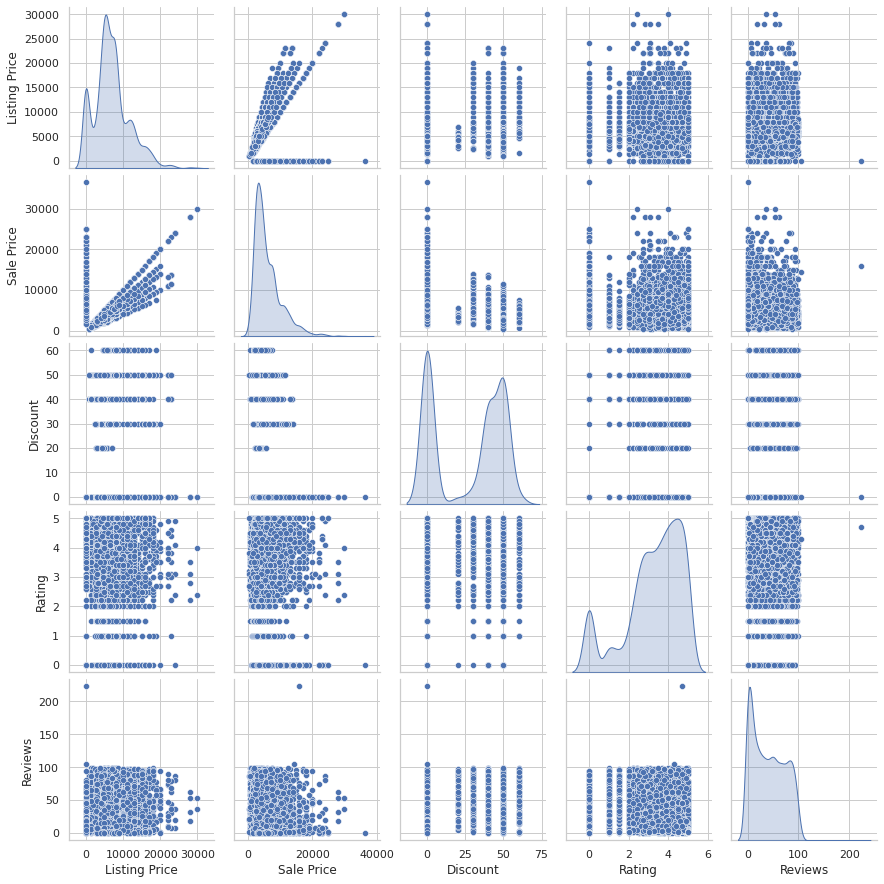

In [ ]:
sns.pairplot(df, diag_kind="kde")

In [ ]:
xd = pd.pivot_table(data=df, index="Product ID", columns="Product ID", aggfunc="count",)

In [ ]:
xd = df[["Product ID", "Product Name"]].value_counts()

In [ ]:
pd.DataFrame(xd).reset_index().rename({0: "Counts"}, axis=1).sort_values(
    by=["Product ID"], ascending=True
)

,Product ID,Product Name,Counts
8,130690-017,Air Jordan 12 Retro,2
78,133000-106,Air Jordan OG,2
1093,280648,Men's Originals Summer Adilette Slippers,1
1092,288022,Men's Originals Summer Adilette Slides,1
1091,310805-137,Air Jordan 10 Retro,1
...,...,...,...
2118,S75104,Men's adidas Originals STAN SMITH Low Shoes,1
2117,S78048,Men's Swim Adilette Supercloud Plus Thongs,1
2116,S80662,Women's adidas RUNNING cosmic 2 Low Shoes,1
2386,S80807,WoMEN'S adidas Outdoor TERREX VOYAGER DLX SHOES,1


In [ ]:
df.corr()

,Listing Price,Sale Price,Discount,Rating,Reviews
Listing Price,1.000000,0.312255,0.125999,0.099764,0.161296
Sale Price,0.312255,1.000000,-0.594659,-0.042172,-0.240728
Discount,0.125999,-0.594659,1.000000,0.081510,0.313591
Rating,0.099764,-0.042172,0.081510,1.000000,0.140577
Reviews,0.161296,-0.240728,0.313591,0.140577,1.000000


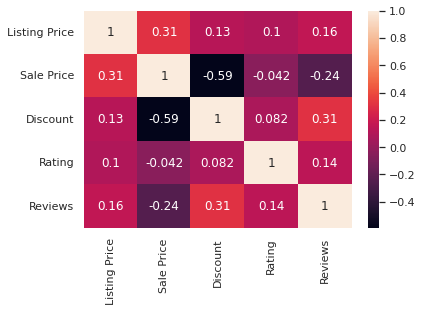

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.iloc[:, 1:]

,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...
3263,CI1236-100,15995,12797,0,Nike,5.0,1
3264,AO0578-717,4995,3497,0,Nike,0.0,0
3265,AT7978-414,8495,5947,0,Nike,5.0,1
3266,AH6799-300,0,16995,0,Nike,4.0,4


In [ ]:
df["Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

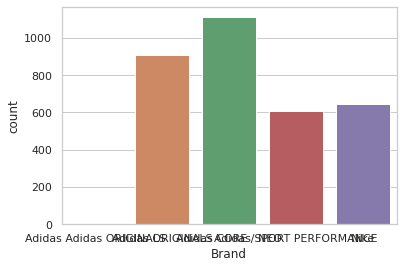

In [ ]:
sns.countplot(df["Brand"])

In [ ]:
from altair import api
import altair as alt

In [ ]:
# df2.pivot_table(values='X', index='Y', columns='Z', aggfunc=lambda x: len(x.unique()))


In [ ]:
# df.loc[df["Brand"] == "Nike", ["Sale Price", "Product ID"]].groupby("Product ID").max()
df[["Rating", "Product ID", "Brand"]].groupby("Brand").max().T.melt()

,Brand,value
0,Adidas Adidas ORIGINALS,4.8
1,Adidas Adidas ORIGINALS,AH2430
2,Adidas CORE / NEO,5
3,Adidas CORE / NEO,S80662
4,Adidas ORIGINALS,5
5,Adidas ORIGINALS,S82260
6,Adidas SPORT PERFORMANCE,5
7,Adidas SPORT PERFORMANCE,S80807
8,Nike,5
9,Nike,DA4155-400


In [ ]:
pd.crosstab(df["Brand"], [df["Product ID"], df["Rating"]])

Product ID               130690-017 133000-106 280648 288022 310805-137  \
Rating                          4.5        0.0    4.2    3.3        4.7   
Brand                                                                     
Adidas Adidas ORIGINALS           0          0      0      0          0   
Adidas CORE / NEO                 0          0      0      0          0   
Adidas ORIGINALS                  0          0      1      1          0   
Adidas SPORT PERFORMANCE          0          0      0      0          0   
Nike                              2          2      0      0          1   

Product ID               313358-006 315115-112 315122-001 315123-111  \
Rating                          4.8        4.5        4.5        4.5   
Brand                                                                  
Adidas Adidas ORIGINALS           0          0          0          0   
Adidas CORE / NEO                 0          0          0          0   
Adidas ORIGINALS                  0          0          0          0   
Adidas SPORT PERFORMANCE          0          0          0          0   
Nike                              2          1          1          1   

Product ID               325213-139 343880-090 343881-412 366731-100  \
Rating                          3.6        4.1        4.3        3.8   
Brand                                                                  
Adidas Adidas ORIGINALS           0          0          0          0   
Adidas CORE / NEO                 0          0          0          0   
Adidas ORIGINALS                  0          0          0          0   
Adidas SPORT PERFORMANCE          0          0          0          0   
Nike                              1          1          1          1   

Product ID               414571-030 415445-102 487471-003 487754-303  \
Rating                          3.9        4.1        4.2        3.9   
Brand                                                                  
Adidas Adidas ORIGINALS           0          0          0          0   
Adidas CORE / NEO                 0          0          0          0   
Adidas ORIGINALS                  0          0          0          0   
Adidas SPORT PERFORMANCE          0          0          0          0   
Nike                              2          1          1          1   

Product ID               488161-602 528895-003 553558-125 554724-050  \
Rating                          3.8        4.4        4.6        0.0   
Brand                                                                  
Adidas Adidas ORIGINALS           0          0          0          0   
Adidas CORE / NEO                 0          0          0          0   
Adidas ORIGINALS                  0          0          0          0   
Adidas SPORT PERFORMANCE          0          0          0          0   
Nike                              1          1          2          1   

Product ID               554724-066 618919-031 631261-035 634835-108  \
Rating                          4.5        4.1        3.0        4.5   
Brand                                                                  
Adidas Adidas ORIGINALS           0          0          0          0   
Adidas CORE / NEO                 0          0          0          0   
Adidas ORIGINALS                  0          0          0          0   
Adidas SPORT PERFORMANCE          0          0          0          0   
Nike                              1          1          1          1   

Product ID               640744-016 704939-103 705265-006 749571-154  \
Rating                          4.1        4.3        5.0        4.2   
Brand                                                                  
Adidas Adidas ORIGINALS           0          0          0          0   
Adidas CORE / NEO                 0          0          0          0   
Adidas ORIGINALS                  0          0          0          0   
Adidas SPORT PERFORMANCE          0          0          0          0   
Nike      

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3268.0,6868.020196,4724.659386,0.0,4299.0,5999.0,8999.0,29999.0
Sale Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,26.875765,22.633487,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0


In [ ]:
si = SimpleImputer(missing_values=0, strategy="mean")

In [ ]:
impute = si.fit(df[["Listing Price"]])

In [ ]:
df["Listing Price"] = si.transform(df[["Listing Price"]])

In [ ]:
df.columns != "object"

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
num_cat = list(df.columns[df.dtypes != "object"])

In [ ]:
num_cat

['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

In [ ]:
sc = StandardScaler()

In [ ]:
scale = sc.fit(df[num_cat])

In [ ]:
df[num_cat] = scale.transform(df[num_cat])

In [ ]:
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,1.818800,0.317928,1.021839,Adidas Adidas ORIGINALS,1.090476,0.014214
1,Women's adidas Originals Sleek Shoes,G27341,-0.076450,-0.544022,1.021839,Adidas ORIGINALS,0.040524,-0.524807
2,Women's adidas Swim Puka Slippers,CM0081,-1.766808,-1.289493,0.579948,Adidas CORE / NEO,-0.449453,-0.112615
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,-0.230119,-0.613910,1.021839,Adidas CORE / NEO,0.600498,-0.176029
4,Women's adidas Originals Taekwondo Shoes,D98205,0.025996,-0.497431,1.021839,Adidas ORIGINALS,0.180518,0.997134


In [ ]:
df[df.columns[df.dtypes != "O"]]

,Listing Price,Sale Price,Discount,Rating,Reviews
0,1.818800e+00,0.317928,1.021839,1.090476,0.014214
1,-7.644985e-02,-0.544022,1.021839,0.040524,-0.524807
2,-1.766808e+00,-1.289493,0.579948,-0.449453,-0.112615
3,-2.301188e-01,-0.613910,1.021839,0.600498,-0.176029
4,2.599611e-02,-0.497431,1.021839,0.180518,0.997134
...,...,...,...,...,...
3263,2.073891e+00,1.552148,-1.187615,1.230469,-1.254071
3264,-7.433731e-01,-0.614376,-1.187615,-2.269368,-1.285778
3265,1.530291e-01,-0.043625,-1.187615,1.230469,-1.254071
3266,2.329352e-16,2.530112,-1.187615,0.530502,-1.158949


In [ ]:
result = []
sizes = range(2, 12)
for size in sizes:
    k2 = KMeans(random_state=42, n_clusters=size)
    k2.fit(df[df.columns[df.dtypes != "O"]])
    result.append(k2.inertia_)

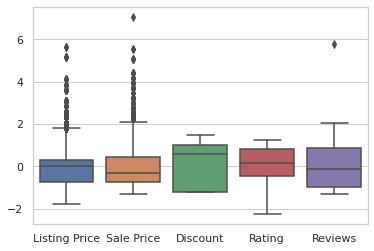

In [ ]:
sns.boxplot(data=df)

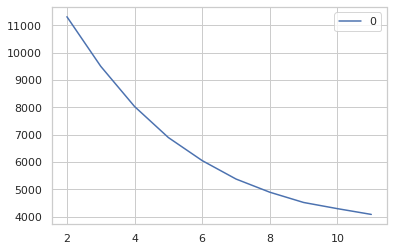

In [ ]:
pd.DataFrame(result, index=sizes).plot()

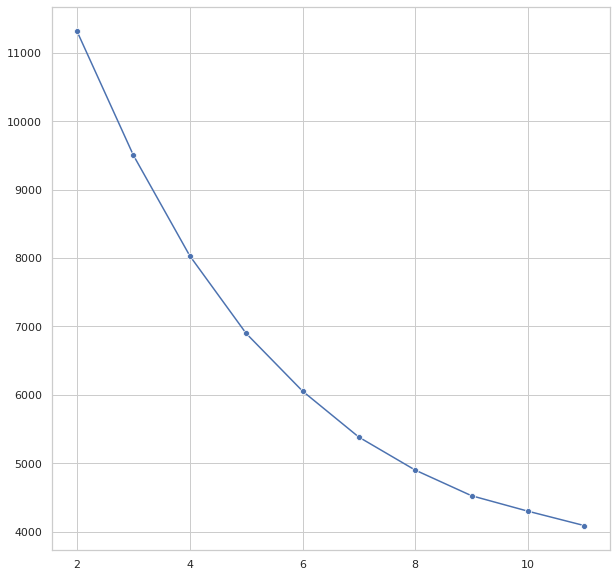

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.lineplot(y=result, x=sizes, marker="o")

In [ ]:
kf = KMeans(random_state=42, n_clusters=7)
kf.fit(df[df.columns[df.dtypes != "O"]])

KMeans(n_clusters=7, random_state=42)